In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

**Performance Section:**
Based on performance-results.json from output

In [42]:
# Read the JSON file into a DataFrame
data = pd.read_json('performance-results.json')
pDf = pd.json_normalize(data['data'])
# Display the DataFrame
pDf

,N,criticalWorkDone,iters,lock,maxBackoffDelay,numberOfThreads,outsideWork,outsideWorkDone,targetWork,time,totalWorkDone
0,1000003,500,0,TAS,0,1,0,0,500,910.0,500
1,1000003,1000,0,TAS,0,1,0,0,1000,1866.0,1000
2,1000003,2000,0,TAS,0,1,0,0,2000,3534.0,2000
3,1000003,501,0,TAS,0,2,0,0,500,1053.0,501
4,1000003,501,0,TAS,300,2,0,0,500,753.0,501
...,...,...,...,...,...,...,...,...,...,...,...
1186,1000003,256,0,MUTEX,0,8,3,749,1000,723.0,1005
1187,1000003,2007,0,MUTEX,0,8,0,0,2000,3134.0,2007
1188,1000003,1007,0,MUTEX,0,8,1,1000,2000,2587.0,2007
1189,1000003,673,0,MUTEX,0,8,2,1333,2000,1682.0,2006


In [43]:
defaultLock = (pDf['targetWork'] == 500) & (pDf['maxBackoffDelay'] == 0) & (pDf['iters'] == 0) & (pDf['outsideWork'] == 0)
defaultDf = pDf.sort_values('numberOfThreads')[defaultLock]

defaultDf[pDf['lock'] == 'TAS']

<ipython-input-43-75ad580b857e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  defaultDf = pDf.sort_values('numberOfThreads')[defaultLock]
<ipython-input-43-75ad580b857e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  defaultDf[pDf['lock'] == 'TAS']


,N,criticalWorkDone,iters,lock,maxBackoffDelay,numberOfThreads,outsideWork,outsideWorkDone,targetWork,time,totalWorkDone
0,1000003,500,0,TAS,0,1,0,0,500,910.0,500
3,1000003,501,0,TAS,0,2,0,0,500,1053.0,501
51,1000003,502,0,TAS,0,3,0,0,500,1119.0,502
99,1000003,503,0,TAS,0,4,0,0,500,1066.0,503
147,1000003,504,0,TAS,0,5,0,0,500,1186.0,504
195,1000003,505,0,TAS,0,6,0,0,500,1251.0,505
243,1000003,506,0,TAS,0,7,0,0,500,1344.0,506
291,1000003,507,0,TAS,0,8,0,0,500,1361.0,507


In [44]:
x = np.linspace(1, 8, 8)
noBuiltIn = (pDf['lock'] != 'MUTEX') & (pDf['lock'] != 'OMP')

target500 = (pDf['targetWork'] == 500) & (pDf['maxBackoffDelay'] == 0) & (pDf['iters'] == 0) & (pDf['outsideWork'] == 0)
target1000 = (pDf['targetWork'] == 1000) & (pDf['maxBackoffDelay'] == 0) & (pDf['iters'] == 0) & (pDf['outsideWork'] == 0)
target2000 = (pDf['targetWork'] == 2000) & (pDf['maxBackoffDelay'] == 0) & (pDf['iters'] == 0) & (pDf['outsideWork'] == 0)

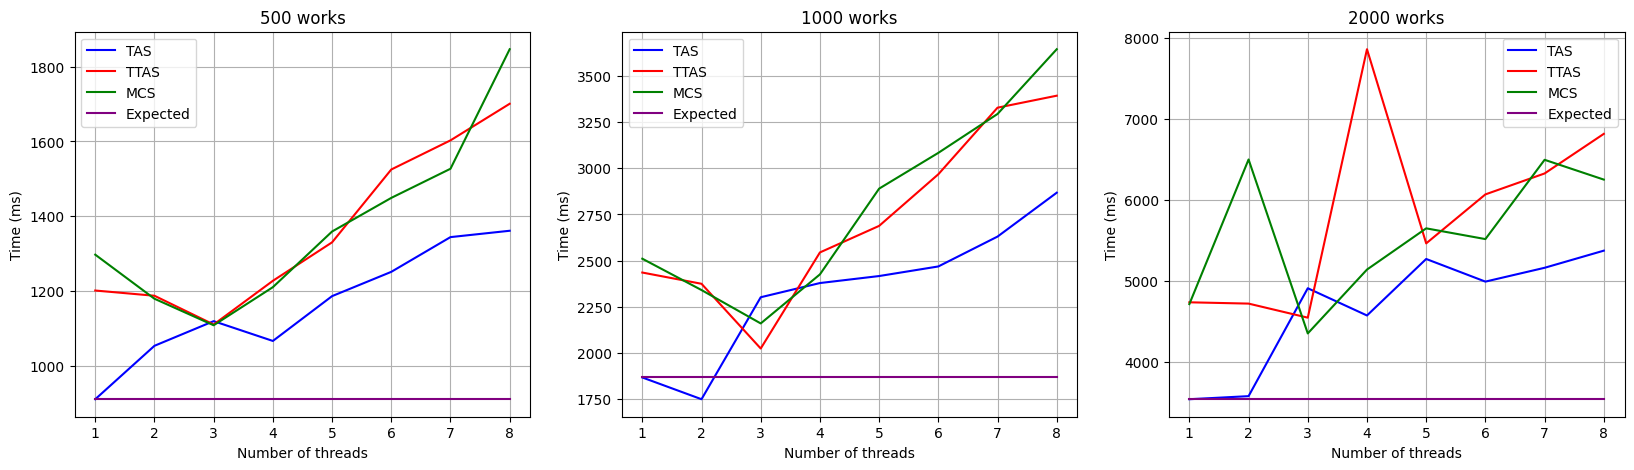

<Figure size 640x480 with 0 Axes>

In [55]:
# Performance of each lock with default config: max_back_off_delays = 0 & outside_work = 0

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

def definePlotForEachTargetWork(target, aX, title):
    targetDf = pDf[target & noBuiltIn].sort_values('numberOfThreads')
    y1 = targetDf[targetDf['lock'] == 'TAS']['time']
    y2 = targetDf[targetDf['lock'] == 'TTAS']['time']
    y3 = targetDf[targetDf['lock'] == 'MCS']['time']
    y4 = np.repeat(targetDf[targetDf['numberOfThreads'] == 1]['time'].min(), 8)
    axes[aX].plot(x, y1, label='TAS', color='blue')
    axes[aX].plot(x, y2, label='TTAS', color='red')
    axes[aX].plot(x, y3, label='MCS', color='green')
    axes[aX].plot(x, y4, label='Expected', color='purple')
    axes[aX].set_title(title)
    axes[aX].set_ylabel('Time (ms)')
    axes[aX].set_xlabel('Number of threads')
    axes[aX].grid(True)
    axes[aX].legend()

# Plot on each subplot
definePlotForEachTargetWork(target500, 0, '500 works')
definePlotForEachTargetWork(target1000, 1, '1000 works')
definePlotForEachTargetWork(target2000, 2, '2000 works')

# Show plot
plt.show()

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


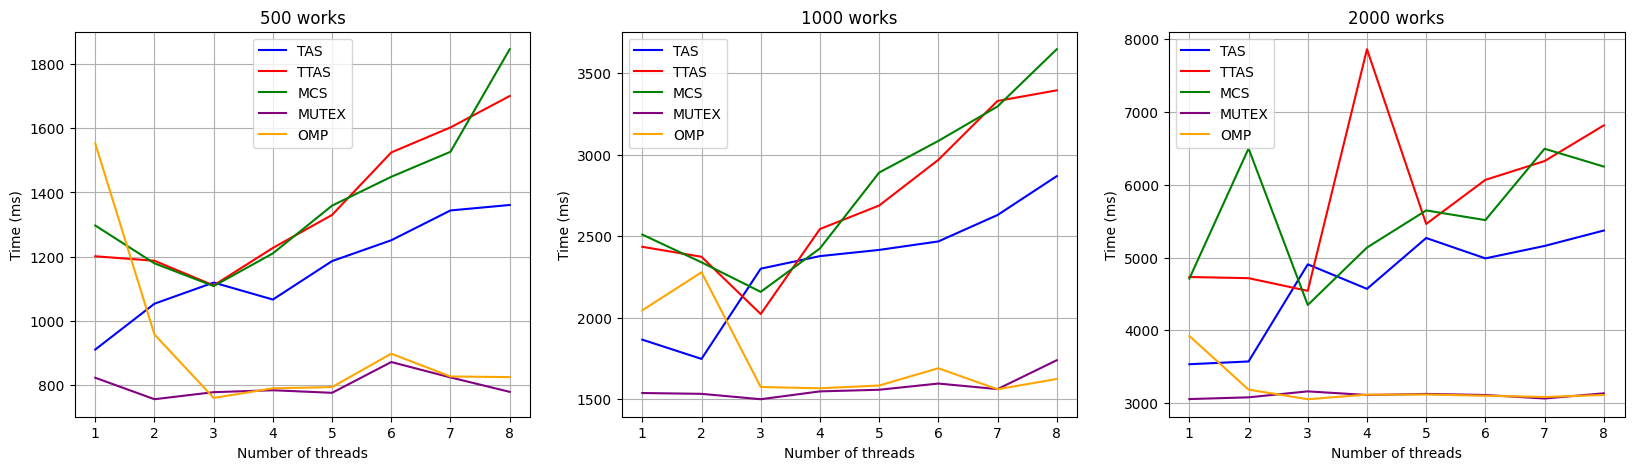

<Figure size 640x480 with 0 Axes>

In [57]:
# Performance of each lock with default config: max_back_off_delays = 0 & outside_work = 0 - Compare with C++ built-in mutex và OpenMP omp_lock
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

def definePlotForEachTargetWork2(target, aX, title):
    targetDf = pDf[target].sort_values('numberOfThreads')
    y1 = targetDf[targetDf['lock'] == 'TAS']['time']
    y2 = targetDf[targetDf['lock'] == 'TTAS']['time']
    y3 = targetDf[targetDf['lock'] == 'MCS']['time']
    y4 = targetDf[targetDf['lock'] == 'MUTEX']['time']
    y5 = targetDf[targetDf['lock'] == 'OMP']['time']

    axes[aX].plot(x, y1, label='TAS', color='blue')
    axes[aX].plot(x, y2, label='TTAS', color='red')
    axes[aX].plot(x, y3, label='MCS', color='green')
    axes[aX].plot(x, y4, label='MUTEX', color='purple')
    axes[aX].plot(x, y5, label='OMP', color='orange')
    axes[aX].set_title(title)
    axes[aX].set_ylabel('Time (ms)')
    axes[aX].set_xlabel('Number of threads')
    axes[aX].grid(True)
    axes[aX].legend()
# Plot on each subplot
definePlotForEachTargetWork2(target500, 0, '500 works')
definePlotForEachTargetWork2(target1000, 1, '1000 works')
definePlotForEachTargetWork2(target2000, 2, '2000 works')

# Show plot
plt.show()

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

In [77]:
def byBackoffByLock(lock, backoff, work):
  return (pDf['targetWork'] == work) & (pDf['lock'] == lock) & (pDf['iters'] == 0) & (pDf['outsideWork'] == 0) & (pDf['numberOfThreads'] > 1) & (pDf['maxBackoffDelay']==backoff)

In [78]:
def backoffplot(lock, work):
  a = pDf[(pDf['numberOfThreads'] > 1) & byBackoffByLock(lock, 0, work)]['time']
  b = pDf[(pDf['numberOfThreads'] > 1) & byBackoffByLock(lock, 300, work)]['time']
  c = pDf[(pDf['numberOfThreads'] > 1) & byBackoffByLock(lock, 600, work)]['time']
  d = pDf[(pDf['numberOfThreads'] > 1) & byBackoffByLock(lock, 900, work)]['time']

  thread_counts = [2, 3, 4, 5, 6, 7, 8]
  bar_width = 0.2
  index = np.arange(7)
  fig, ax = plt.subplots(figsize=(10, 6))
  ax.bar(
      index + 0 * bar_width,
      a,
      width=bar_width,
      label='0ms'
  )
  ax.bar(
      index + 1 * bar_width,
      b,
      width=bar_width,
      label='300ms'
  )
  ax.bar(
      index + 2 * bar_width,
      c,
      width=bar_width,
      label='600ms'
  )
  ax.bar(
      index + 3 * bar_width,
      d,
      width=bar_width,
      label='900ms'
  )
  # Customize the plot
  ax.set_xlabel('Threads')
  ax.set_ylabel('Time (ms)')
  ax.set_title('Performance with Exponential Backoff')
  ax.set_xticks(index + bar_width * (4 - 1) / 2)
  ax.set_xticklabels(thread_counts)
  ax.legend()

  plt.tight_layout()
  plt.show()

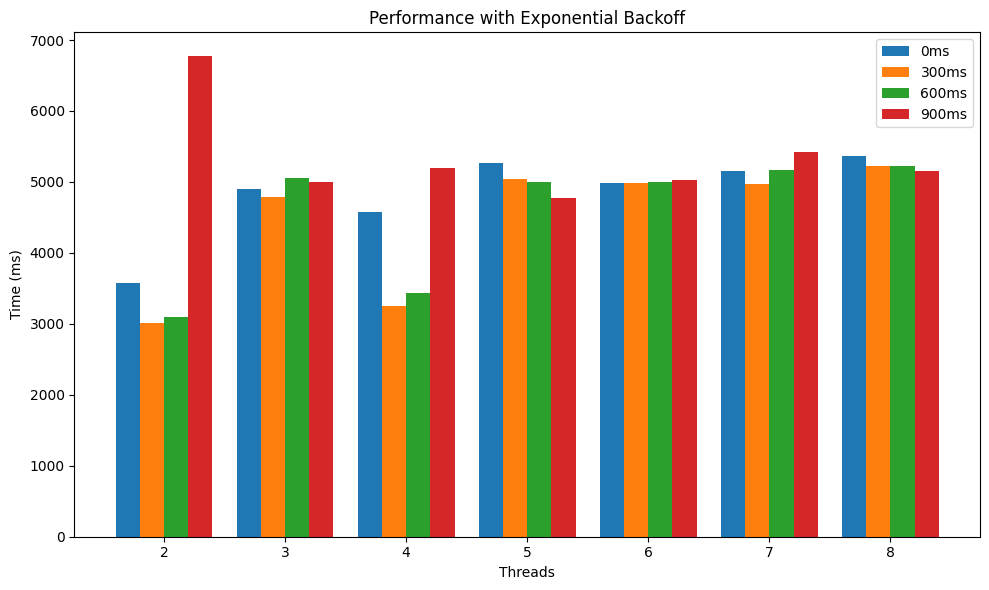

In [79]:
# Testing each lock with each exponential backoff settings. Adjust 2nd param to change the quantity of work
backoffplot('TAS', 2000)

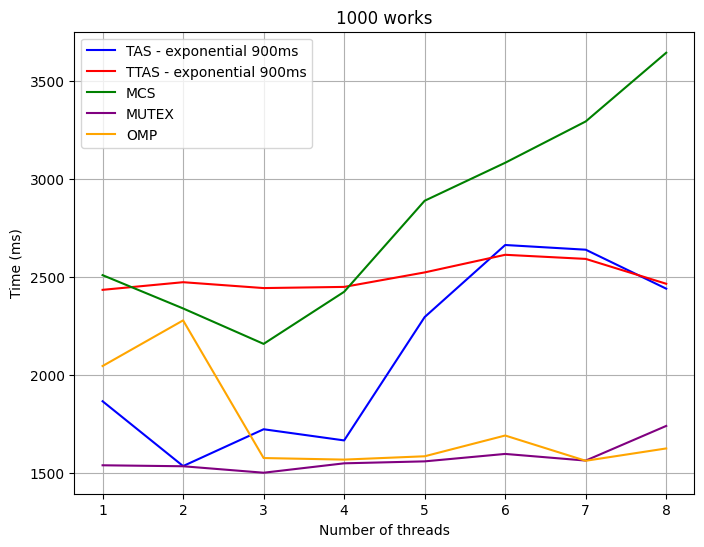

<Figure size 640x480 with 0 Axes>

In [80]:
# Compare between TAS, TTAS, MCS (the most efficient exponential backoff config) and MUTEX / OMP
fig = plt.subplots(figsize=(8, 6))

def definePlotForEachTargetWork3(work, aX, aY, title):
    x = np.linspace(1, 8, 8)
    targetWithEBSetting = (pDf['targetWork'] == work) & (pDf['iters'] == 0) & (pDf['outsideWork'] == 0)
    targetDf = pDf[targetWithEBSetting].sort_values('numberOfThreads')
    y1 = targetDf[(targetDf['lock'] == 'TAS') & ((targetDf['maxBackoffDelay'] == 900) | (targetDf['numberOfThreads'] == 1))]['time']
    y2 = targetDf[(targetDf['lock'] == 'TTAS') & ((targetDf['maxBackoffDelay'] == 900) | (targetDf['numberOfThreads'] == 1))]['time']
    y3 = targetDf[(targetDf['lock'] == 'MCS') & (targetDf['maxBackoffDelay'] == 0)]['time']
    y4 = targetDf[(targetDf['lock'] == 'MUTEX') & (targetDf['maxBackoffDelay'] == 0)]['time']
    y5 = targetDf[(targetDf['lock'] == 'OMP') & (targetDf['maxBackoffDelay'] == 0)]['time']

    plt.plot(x, y1, label='TAS - exponential 900ms', color='blue')
    plt.plot(x, y2, label='TTAS - exponential 900ms', color='red')
    plt.plot(x, y3, label='MCS', color='green')
    plt.plot(x, y4, label='MUTEX', color='purple')
    plt.plot(x, y5, label='OMP', color='orange')
    plt.title(title)
    plt.ylabel('Time (ms)')
    plt.xlabel('Number of threads')
    plt.grid(True)
    plt.legend()

# Adjust 1st param to change the number of works
definePlotForEachTargetWork3(1000, 0, 0, '1000 works')

plt.show()

plt.tight_layout()

plt.show()

In [81]:
def byOutsideworkByLock(lock, outside, work):
  return (pDf['targetWork'] == work) & (pDf['lock'] == lock) & (pDf['iters'] == 0) & (pDf['outsideWork'] == outside) & (pDf['numberOfThreads'] > 1) & (pDf['maxBackoffDelay']==0)

pDf[byOutsideworkByLock('TAS', 2, 2000)]

,N,criticalWorkDone,iters,lock,maxBackoffDelay,numberOfThreads,outsideWork,outsideWorkDone,targetWork,time,totalWorkDone
43,1000003,667,0,TAS,0,2,2,1333,2000,1788.0,2000
91,1000003,668,0,TAS,0,3,2,1333,2000,2555.0,2001
139,1000003,668,0,TAS,0,4,2,1332,2000,2061.0,2000
187,1000003,669,0,TAS,0,5,2,1333,2000,2204.0,2002
235,1000003,671,0,TAS,0,6,2,1333,2000,2169.0,2004
283,1000003,671,0,TAS,0,7,2,1333,2000,2271.0,2004
331,1000003,672,0,TAS,0,8,2,1332,2000,2341.0,2004


In [82]:
def outsideworkplot(lock, work):
  a = pDf[(pDf['numberOfThreads'] > 1) & byOutsideworkByLock(lock, 0, work)]['time']
  b = pDf[(pDf['numberOfThreads'] > 1) & byOutsideworkByLock(lock, 1, work)]['time']
  c = pDf[(pDf['numberOfThreads'] > 1) & byOutsideworkByLock(lock, 2, work)]['time']
  d = pDf[(pDf['numberOfThreads'] > 1) & byOutsideworkByLock(lock, 3, work)]['time']

  thread_counts = [2, 3, 4, 5, 6, 7, 8]
  bar_width = 0.2
  index = np.arange(7)
  fig, ax = plt.subplots(figsize=(10, 6))
  ax.bar(
      index + 0 * bar_width,
      a,
      width=bar_width,
      label='0'
  )
  ax.bar(
      index + 1 * bar_width,
      b,
      width=bar_width,
      label='1'
  )
  ax.bar(
      index + 2 * bar_width,
      c,
      width=bar_width,
      label='2'
  )
  ax.bar(
      index + 3 * bar_width,
      d,
      width=bar_width,
      label='3'
  )
  # Customize the plot
  ax.set_xlabel('Threads')
  ax.set_ylabel('Time (ms)')
  ax.set_title('Performance with Outside Works')
  ax.set_xticks(index + bar_width * (4 - 1) / 2)
  ax.set_xticklabels(thread_counts)
  ax.legend()

  plt.tight_layout()
  plt.show()

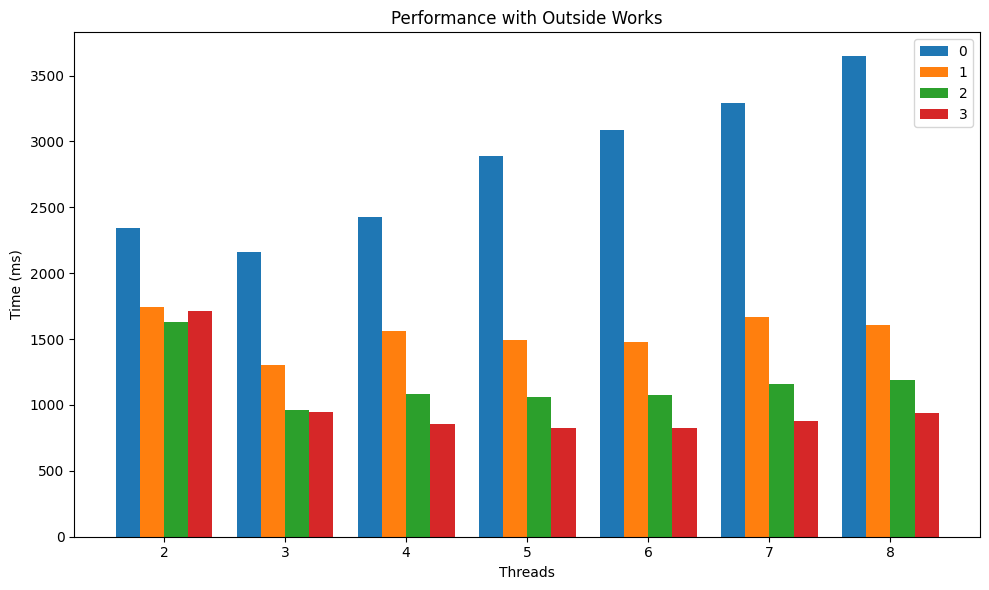

In [ ]:
# Performance of lock under effect of outside works. Params (lockType, numberOfWorks)
outsideworkplot('MCS', 1000)

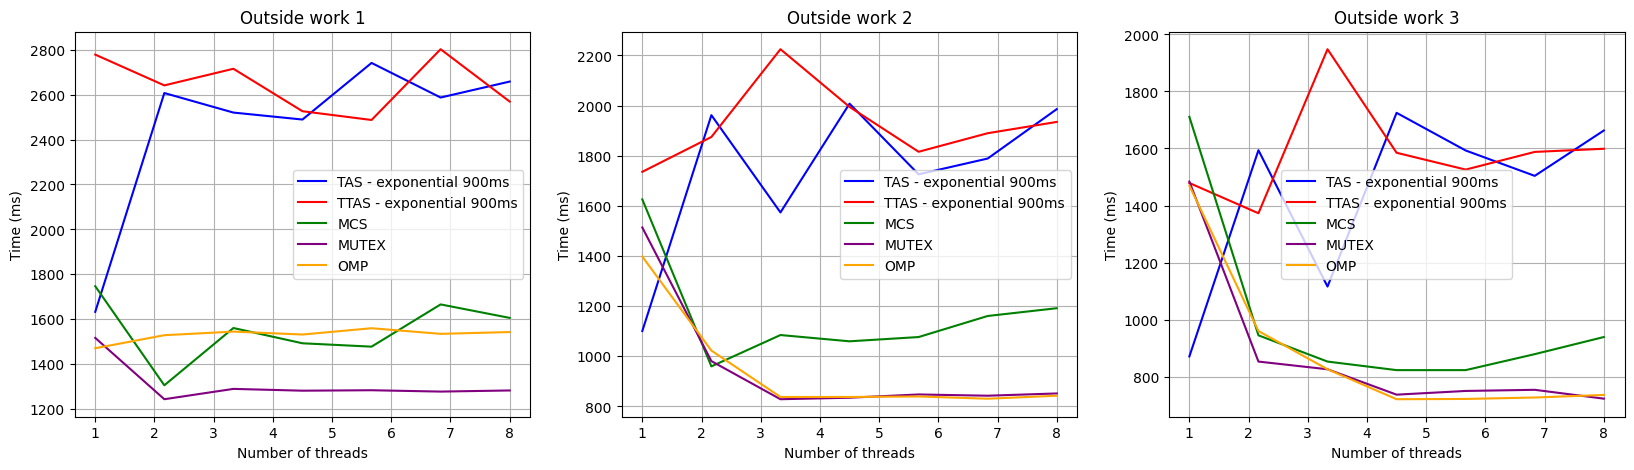

<Figure size 640x480 with 0 Axes>

In [85]:
# Compare each lock under effect of outside works
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

def definePlotForEachTargetWork3(outside, work, aX, title):
    mask = (pDf['targetWork'] == work) & (pDf['iters'] == 0) & (pDf['outsideWork'] == outside)
    x = np.linspace(1, 8, 7)
    targetDf = pDf[mask].sort_values('numberOfThreads')
    y1 = targetDf[(targetDf['lock'] == 'TAS') & ((targetDf['maxBackoffDelay'] == 900))]['time']
    y2 = targetDf[(targetDf['lock'] == 'TTAS') & ((targetDf['maxBackoffDelay'] == 900))]['time']
    y3 = targetDf[(targetDf['lock'] == 'MCS') & (targetDf['maxBackoffDelay'] == 0)]['time']
    y4 = targetDf[(targetDf['lock'] == 'MUTEX') & (targetDf['maxBackoffDelay'] == 0)]['time']
    y5 = targetDf[(targetDf['lock'] == 'OMP') & (targetDf['maxBackoffDelay'] == 0)]['time']

    axes[aX].plot(x, y1, label='TAS - exponential 900ms', color='blue')
    axes[aX].plot(x, y2, label='TTAS - exponential 900ms', color='red')
    axes[aX].plot(x, y3, label='MCS', color='green')
    axes[aX].plot(x, y4, label='MUTEX', color='purple')
    axes[aX].plot(x, y5, label='OMP', color='orange')
    axes[aX].set_title(title)
    axes[aX].set_ylabel('Time (ms)')
    axes[aX].set_xlabel('Number of threads')
    axes[aX].grid(True)
    axes[aX].legend()
# Plot on each subplot. Change 2nd param for result on different work quantity
definePlotForEachTargetWork3(1, 1000, 0, 'Outside work 1')
definePlotForEachTargetWork3(2, 1000, 1, 'Outside work 2')
definePlotForEachTargetWork3(3, 1000, 2, 'Outside work 3')

# Show plot
plt.show()

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

**Correctness Section:**Phân tích dựa trên correctness-results.json output

In [87]:
# Read the JSON file into a DataFrame
data = pd.read_json('correctness-results.json')
cDf = pd.json_normalize(data['data'])
cDf['noRace'] = cDf['totalWorkDone'] == cDf['numberOfThreads'] * cDf['iters'] * (cDf['outsideWork'] + 1)
# Display the DataFrame
cDf

,N,criticalWorkDone,iters,lock,maxBackoffDelay,numberOfThreads,outsideWork,outsideWorkDone,targetWork,time,totalWorkDone,noRace
0,1000003,500,500,TAS,0,1,0,0,0,758.0,500,True
1,1000003,1000,1000,TAS,0,1,0,0,0,1531.0,1000,True
2,1000003,2000,2000,TAS,0,1,0,0,0,3123.0,2000,True
3,1000003,1000,500,TAS,0,2,0,0,0,1525.0,1000,True
4,1000003,1000,500,TAS,300,2,0,0,0,1433.0,1000,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1186,1000003,8000,1000,MUTEX,0,8,3,24000,0,20408.0,32000,True
1187,1000003,16000,2000,MUTEX,0,8,0,0,0,10277.0,16000,True
1188,1000003,16000,2000,MUTEX,0,8,1,16000,0,20628.0,32000,True
1189,1000003,16000,2000,MUTEX,0,8,2,32000,0,31297.0,48000,True


In [88]:
# Check the condition: totalWorkDone == num_of_threads * num_of_iters * (outside_work + 1). If true, there's no race condition.
raceTas = (cDf['targetWork'] == 1000) & (cDf['maxBackoffDelay'] == 0) & (cDf['iters'] == 0) & (cDf['outsideWork'] == 0)
unique_counts = cDf['noRace'].value_counts()
print(unique_counts)

noRace
True    1191
Name: count, dtype: int64
